In [40]:
import numpy as np
a = np.random.random((10, 3))
print(a) #argmin - индекс минимального элемента по какой-то оси
print(a[np.arange(10), np.argmin(np.abs(a-0.5), axis = 1)])

[[0.36279699 0.41203204 0.92820925]
 [0.45907996 0.74571703 0.25512993]
 [0.11535165 0.9296573  0.00806683]
 [0.29290049 0.65015816 0.55332012]
 [0.25303336 0.58485294 0.92697953]
 [0.96921632 0.39860963 0.52296664]
 [0.72014462 0.36352484 0.18163184]
 [0.21485064 0.48266312 0.74795167]
 [0.16354028 0.6003276  0.17758313]
 [0.9993955  0.73446231 0.90156075]]
[0.41203204 0.45907996 0.11535165 0.55332012 0.58485294 0.52296664
 0.36352484 0.48266312 0.6003276  0.73446231]


Problem №2

In [44]:
import numpy as np
a = np.random.random((6, 6))
print(a)
#print(np.sum(a, axis = 0))
#print(np.min(a, axis = 1))
print()
print(np.divide(np.sum(a, axis = 0), np.min(a, axis = 1)))

[[0.61981068 0.11322478 0.71690902 0.69217419 0.69973128 0.78660073]
 [0.00785419 0.73296868 0.76928686 0.53575903 0.26137636 0.55130365]
 [0.20099186 0.20900902 0.40363498 0.26014589 0.63313106 0.75731413]
 [0.02888618 0.4383561  0.33512459 0.34609524 0.8926694  0.85536031]
 [0.34757458 0.99913802 0.54299118 0.40945729 0.57310121 0.9182879 ]
 [0.44236923 0.92238571 0.91487954 0.60560657 0.59688591 0.06468163]]

[ 14.55058481 434.8101997   18.32326054  98.63673706  10.52118153
  60.81399607]


Problem №3

In [46]:
import numpy as np
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max = 0
for i in range(1,len(x)):
    if x[i-1] == 0:
        if x[i] > max:
            max = x[i]
print(max)

5


Problem №4

In [49]:
import numpy as np
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
print(x + np.bincount(i, minlength = len(x)))

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


Problem №5 (algorithm k-means)

In [8]:
import numpy as np
def data_st(matrix): 
    n = matrix.shape[1] 
    m = matrix.shape[0]
    means = np.mean(matrix, axis=0)
    dev = np.std(matrix, axis = 0)
    matrix = matrix - means
    matrix = np.divide(matrix, dev)
    return matrix

In [19]:
import numpy as np
from scipy.spatial import distance

def reevaluate_centroids(obs, centroids, k):
    new_centroids = np.empty((len(centroids),len(centroids[0])))
    distortion = distance.cdist(obs, centroids, 'sqeuclidean')
    mat = np.hstack((obs, distortion.argmin(axis=1).reshape(len(distortion),1)))
    for i in range(len(centroids)):
        new_centroids[i] = np.vstack(row for row in mat if row[-1] == i).mean(axis=0)[:-1]
        
    return new_centroids        

In [20]:
import numpy as np
from scipy.spatial import distance

def compute_distort(obs, centroids, k):
    D = distance.cdist(obs, centroids, 'euclidean')
    return sum(np.min(D, axis=1))

In [21]:
import numpy as np
from scipy.spatial import distance

def k_means(obs, k, thresh):
    if type(k) == int:
        centroids = obs[np.random.choice(range(len(obs)), k, False)]
    else:
        centroids = k
    prev_d = -1
    cur_d = compute_distort(obs, centroids, k)
    while abs(cur_d - prev_d) > thresh:
        centroids = reevaluate_centroids(obs, centroids, k)
        prev_d = cur_d
        cur_d = compute_distort(obs, centroids, k)
    return centroids, cur_d

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
def elbow_method(obs, thresh):
    distortions = []
    K = range(1, 16)
    for k in K:
        distortions.append(k_means(obs, k, thresh)[1])
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

Problem №6

Разрез возраст-зарплата

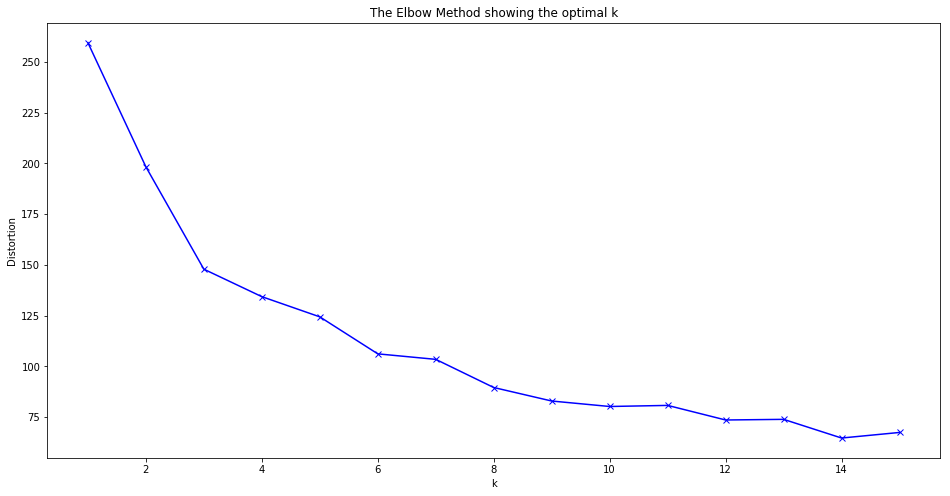

In [24]:
import numpy as np
from scipy.spatial import distance


url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
AgeInc = np.zeros((200, 2), dtype=np.float)
AgeInc = AgeInc.astype(float)
for i in range(data.shape[0]):
    AgeInc[i][0] = data[i][2]
    AgeInc[i][1] = data[i][3]
AgeInc = data_st(AgeInc)
elbow_method(AgeInc, 1e-5)



Оптимальное k = 3

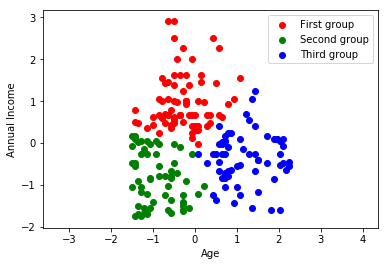

In [25]:
centroids, distort = k_means(AgeInc, 3, 1e-5)
distortion = distance.cdist(AgeInc, centroids, 'sqeuclidean')
matrix = np.hstack((AgeInc, distortion.argmin(axis=1).reshape(len(distortion),1)))
block1 = np.vstack(row for row in matrix if row[-1] == 0)
block2 = np.vstack(row for row in matrix if row[-1] == 1)
block3 = np.vstack(row for row in matrix if row[-1] == 2)

plt.scatter(block1[:,0], block1[:,1], c='r', label='First group')
plt.scatter(block2[:,0], block2[:,1], c='g', label='Second group')
plt.scatter(block3[:,0], block3[:,1], c='b', label='Third group')
plt.axis('equal')
plt.xlabel("Age")
plt.ylabel("Annual Income")
plt.legend()
plt.show()

3 кластера: молодые люди, люди среднего возраста и пожилые. Доход у людей среднего возраста выше, чем доход молодых и пожилых.

Разрез возраст-покупательский индекс

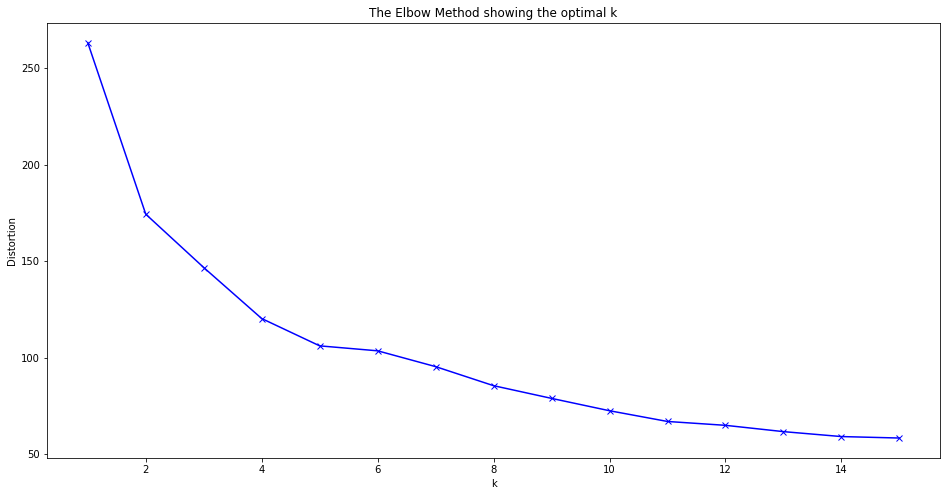

In [26]:
AgeInd = np.zeros((200, 2), dtype=np.float)
AgeInd = AgeInd.astype(float)
for i in range(data.shape[0]):
    AgeInd[i][0] = data[i][2]
    AgeInd[i][1] = data[i][4]
AgeInd = data_st(AgeInd)
elbow_method(AgeInd, 1e-5)

Оптимальное k = 2

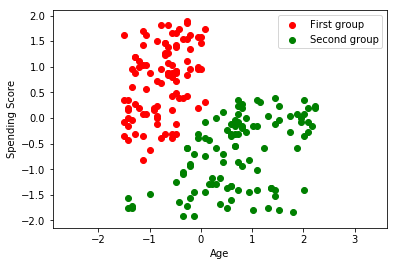

In [27]:
codebook, distor = k_means(AgeInd, 2, 1e-05)

distortion = distance.cdist(AgeInd, codebook, 'sqeuclidean')
matrix = np.hstack((AgeInd, distortion.argmin(axis=1).reshape(len(distortion),1)))
block1 = np.vstack(row for row in matrix if row[-1] == 0)
block2 = np.vstack(row for row in matrix if row[-1] == 1)


plt.scatter(block1[:,0], block1[:,1], c='r', label='First group')
plt.scatter(block2[:,0], block2[:,1], c='g', label='Second group')


plt.axis('equal')
plt.xlabel("Age")
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Потребители разбиты на 2 группы по возрасту. Из визуализации видно, что у более молодых людей (1 группа) Spending Score выше, чем у более страших.

Разрез доход-покупательный индекс

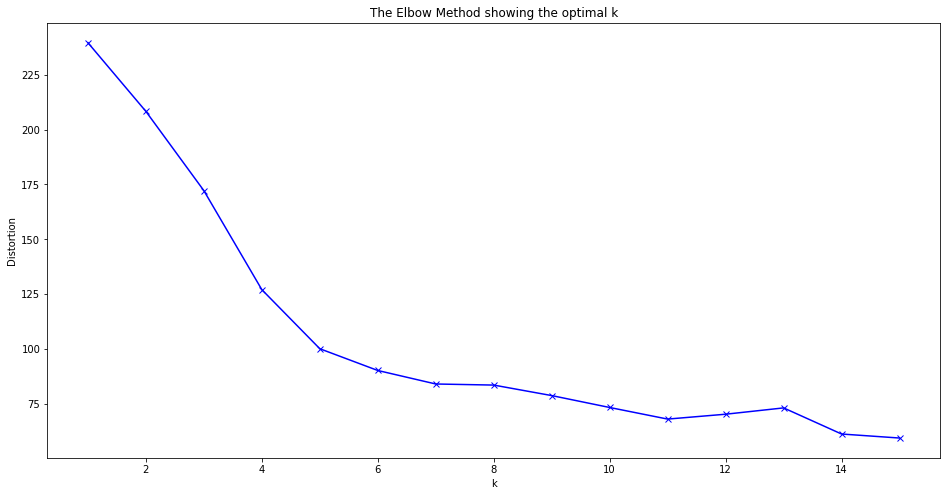

In [29]:
IncInd = np.zeros((200, 2), dtype=np.float)
IncInd = IncInd.astype(float)
for i in range(data.shape[0]):
    IncInd[i][0] = data[i][3]
    IncInd[i][1] = data[i][4]
IncInd = data_st(IncInd)
elbow_method(IncInd, 1e-5)

Оптимальное k = 5

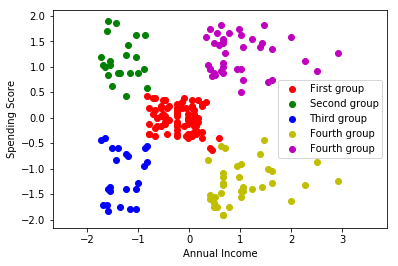

In [33]:
centroids, distort = k_means(IncInd, 5, 1e-05)
distortion = distance.cdist(IncInd, centroids, 'sqeuclidean')
matrix = np.hstack((IncInd, distortion.argmin(axis=1).reshape(len(distortion),1)))
block1 = np.vstack(row for row in matrix if row[-1] == 0)
block2 = np.vstack(row for row in matrix if row[-1] == 1)
block3 = np.vstack(row for row in matrix if row[-1] == 2)
block4 = np.vstack(row for row in matrix if row[-1] == 3)
block5 = np.vstack(row for row in matrix if row[-1] == 4)


plt.scatter(block1[:,0], block1[:,1], c='r', label='First group')
plt.scatter(block2[:,0], block2[:,1], c='g', label='Second group')
plt.scatter(block3[:,0], block3[:,1], c='b', label='Third group')
plt.scatter(block4[:,0], block4[:,1], c='y', label='Fourth group')
plt.scatter(block5[:,0], block5[:,1], c='m', label='Fourth group')

plt.axis('equal')
plt.axis('equal')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

Выделены 5 кластеров потребителей. Можем заметить, что наибольшая группа - группа со средним доходом и средним spending score, что логично.